In [13]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [15]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gec) Chrome/111.0.0.0 Safari/537.36'}
# 
web = requests.get('https://play.google.com/store/books', headers = headers).text

'<!doctype html><html lang="en-US" dir="ltr"><head><base href="https://play.google.com/"><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1"><meta name="mobile-web-app-capable" content="yes"><meta name="apple-mobile-web-app-capable" content="yes"><meta name="google-site-verification" content="sBw2N8uateIzRr93vmFze5MF_35vMk5F1wG04L5JcJE"><meta name="google-site-verification" content="PJKdyVFC5jlu_l8Wo_hirJkhs1cmitmn44fgpOc3zFc"><link rel="search" href="/opensearch.xml" type="application/opensearchdescription+xml" title="Google Play"><link rel="shortcut icon" href="//www.gstatic.com/android/market_images/web/favicon_v3.ico"><script data-id="_gd" nonce="DKnBlxvv3D-wLkA1Wv9trw">window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*","/covid19/exposurenotifications/select","/covid19/exposurenotifications/select/*","/exchange","/exchange/*","/store/ereview","/store/ereview/","/store/linkbuilder","/store/linkbuilder/","/store/movies/dev
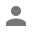
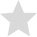
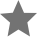
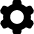
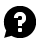
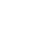
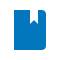
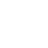
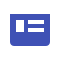
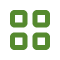
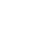
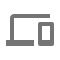
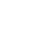
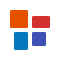
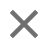
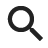
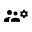
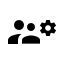
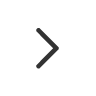
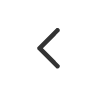
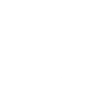
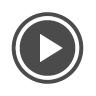
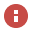
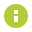
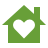
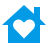
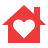
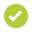
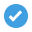
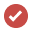

In [16]:
web

In [17]:
soup = BeautifulSoup(web, 'lxml')

<!DOCTYPE html>
<html dir="ltr" lang="en-US">
 <head>
  <base href="https://play.google.com/"/>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="sBw2N8uateIzRr93vmFze5MF_35vMk5F1wG04L5JcJE" name="google-site-verification"/>
  <meta content="PJKdyVFC5jlu_l8Wo_hirJkhs1cmitmn44fgpOc3zFc" name="google-site-verification"/>
  <link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/>
  <link href="//www.gstatic.com/android/market_images/web/favicon_v3.ico" rel="shortcut icon"/>
  <script data-id="_gd" nonce="DKnBlxvv3D-wLkA1Wv9trw">
   window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*","/covid19/exposurenotifications/select","/covid19/exposurenotifications/select/*","/exchange","/exchange/*","/store/ereview","/store/ereview/","/store/linkbuil
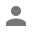
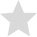
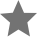
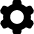
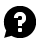
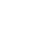
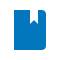
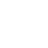
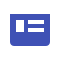
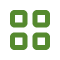
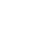
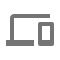
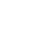
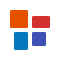
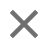
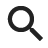
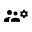
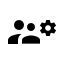
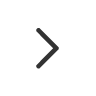
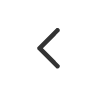
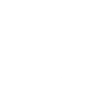
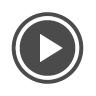
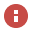
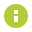
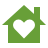
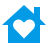
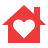
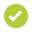
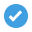
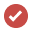

In [18]:
print(soup.prettify())

In [19]:

soup = BeautifulSoup(web, 'html.parser')

In [20]:
# Url To Scrap The Data
web = "https://play.google.com/store/books"

# Sending Requests To URL
response = requests.get(web)

# Extracting MeaningFul Info
soup = BeautifulSoup(response.text, "html.parser")

In [21]:
# Create Variable Of Scrapping div For for loop
# Use ctrl + shift + i to inspect

book_divs = soup.find_all("div", class_="ULeU3b neq64b")

In [37]:
# Declare List To Store Info

book_names = []
book_ratings = []
book_prices = []

# Scrapping All Data In Single Instance
for book_div in book_divs:
        
    try:
        book_name = book_div.find("div", class_="Epkrse").text
        book_names.append(book_name.strip())
    except:
        book_names.append(np.nan)
        
    try:
        book_price = book_div.find("span", class_="VfPpfd VixbEe").text
        book_prices.append(book_price.strip())
    except:
        book_prices.append(np.nan)
        
    try:
        book_rating = book_div.find("div", class_="LrNMN").text
        book_ratings.append(book_rating.strip())
    except:
        book_ratings.append(np.nan)


In [38]:
book_df = pd.DataFrame({
    'Book Name': book_names,
    'Book Ratting': book_ratings,
    'Book Price': book_prices
})

In [39]:
book_df.head(45)

,Book Name,Book Ratting,Book Price
0,It Ends with Us: A Novel,4.6star,$10.99
1,It Starts with Us: A Novel,4.6star,$13.99
2,Lessons in Chemistry: A Novel,4.5star,$14.99
3,Verity,4.6star,$9.99
4,Heart Bones: A Novel,4.5star,$13.99
5,The Seven Husbands of Evelyn Hugo: A Novel,4.5star,$14.99
6,"Tomorrow, and Tomorrow, and Tomorrow: A novel",$13.99,$13.99
7,Ugly Love: A Novel,4.6star,$10.99
8,Demon Copperhead: A Novel,4.5star,$15.99
9,Exiles: A Novel,4.5star,$14.99


In [33]:
book_df.shape

(120, 3)

In [36]:
book_df.sample(2)

,Book Name,Book Ratting,Book Price
2,Lessons in Chemistry: A Novel,4.5star,NaN
39,NaN,NaN,NaN
